# Efficiency and Performance

In [1]:
%matplotlib inline
import time
import pymarket as pm
import numpy as np
import matplotlib.pyplot as plt

## Create a set of markets with varying number of participants

In [41]:
markets = []
range_players = np.arange(20, 200, 20)
M = len(range_players)

for i in range_players:
    bids = pm.datasets.generate(i, i, 2, 1)
    mar = pm.Market()
    for b in bids:
        mar.accept_bid(*b)
    markets.append(mar)  

## Run the diferent markets

In [42]:
elapsed = np.zeros(M)
for i in range(M):
    mar = markets[i]
    start = time.time()
    mar.run('huang')
    stop = time.time()
    elapsed[i] = stop - start

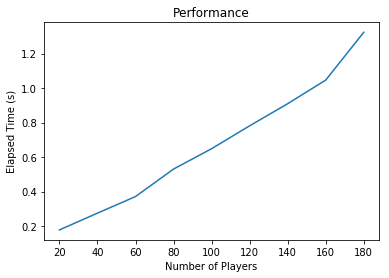

In [43]:
fig, ax = plt.subplots()
ax.plot(range_players, elapsed)
_ = ax.set_xlabel('Number of Players')
_ = ax.set_ylabel('Elapsed Time (s)')
_ = ax.set_title('Performance')

## Obtains the statistics (optimization problems have to be solved)

In [49]:
traded = np.zeros(M)
welfare = np.zeros(M)
stats_time = np.zeros(M)

limit = M
for i in range(limit):
    mar = markets[i]
    start = time.time()
    stats = mar.statistics()
    stop = time.time()
    stats_time[i] = stop - start
    welfare[i] = stats['percentage_welfare']
    traded[i] = stats['percentage_traded']

## Plots the results

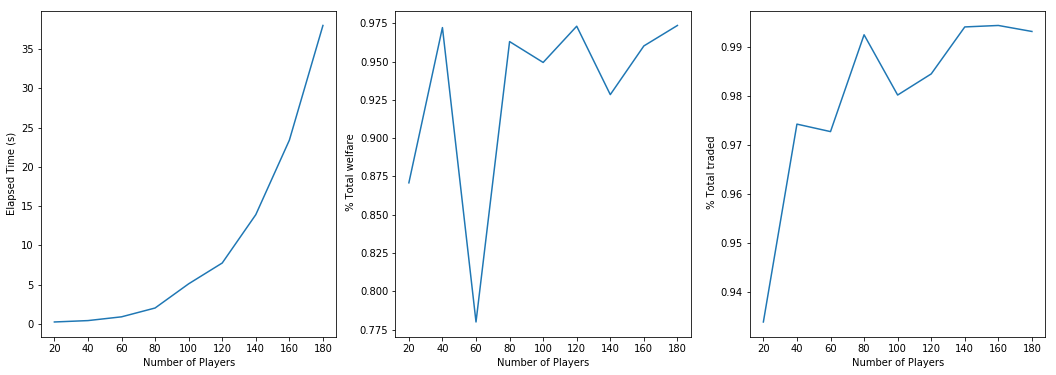

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].plot(range_players[:limit], stats_time[:limit])
ax[0].set_ylabel('Elapsed Time (s)')

ax[1].plot(range_players[:limit], welfare[:limit])
ax[1].set_ylabel(' % Total welfare')

ax[2].plot(range_players[:limit], traded[:limit])
ax[2].set_ylabel(' % Total traded')

for ax_ in ax:
    ax_.set_xlabel('Number of Players')